<a href="https://colab.research.google.com/github/Aleksandra191/PUM_projekt_NA_EM_AK/blob/main/model_podstawowy_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
cleaned_data = pd.read_excel('clean_data_relevant.xlsx')
cleaned_data = cleaned_data[['BROKER', 'LATITUDE', 'LONGITUDE', 'TYPE', 'BOROUGH','NEIGHBOURHOOD', 'BEDS', 'POSTCODE', 'BATH', 'PROPERTYSQFT', 'PRICE']]

In [2]:
cleaned_data

,BROKER,LATITUDE,LONGITUDE,TYPE,BOROUGH,NEIGHBOURHOOD,BEDS,POSTCODE,BATH,PROPERTYSQFT,PRICE
0,277,0.633396,0.505918,2,1,264,0.166667,18,0.2,0.134948,315000
1,844,0.102276,0.103390,6,3,259,0.333333,54,0.2,0.205882,260000
2,217,0.633742,0.505683,2,1,264,0.250000,18,0.1,0.024798,69000
3,844,0.423098,0.534539,6,0,192,0.416667,127,0.2,0.435294,690000
4,277,0.750035,0.556240,2,1,264,0.166667,23,0.2,0.225399,899500
...,...,...,...,...,...,...,...,...,...,...,...
4501,217,0.665089,0.539708,0,1,263,0.083333,40,0.1,0.225399,599000
4502,591,0.563894,0.713574,0,2,196,0.083333,147,0.1,0.225399,245000
4503,277,0.596189,0.453402,0,1,264,0.083333,9,0.1,0.225399,1275000
4504,288,0.588660,0.690689,2,2,91,0.166667,146,0.1,0.049020,598125


In [3]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = LinearRegression().fit(X_train, y_train)

print('Współczynniki: ',reg.coef_)
print('Wyraz wolny', reg.intercept_)

y_pred = reg.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np

print("\nR-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Współczynniki:  [ 4.82637713e+01  1.04212168e+06  4.80951990e+05 -5.98126037e+04
 -3.87799376e+05  2.53902786e+03 -2.46696958e+06 -1.27222931e+04
  8.99609911e+06  8.26434460e+06]
Wyraz wolny -625624.917808031

R-squared: 0.35106361164412225
Mean Absolute Error: 1336828.6355151676
Median Absolute Error: 774706.2717598878
Mean Squared Error: 6797303881835.929
Root Mean Squared Error: 2607163.953769676


Wartość współczynnika determinacji (R^2) wynosi około 0.35, co oznacza, że około 35% zmienności zmiennej PRICE jest wyjaśniona przez nasz model regresji liniowej. Idealna wartość tej miary wynosi 1, więc nasz model sprawuje się umiarkowanie w przewidywaniu nowych wartości.

Wysokie wartości średniego absolutnego błędu, mediany absolutnego błędu oraz błędu średniokwadratowego sugerują, że model ma ograniczoną jakość predykcyjną.

 RMSE, czyli pierwiastek średniokwadratowy błędu, wynoszący około 2.6 miliona, oznacza że wartości przewidywane przez nasz model średnio odbiegają od rzeczywistych wartości o 2.6 miliona.

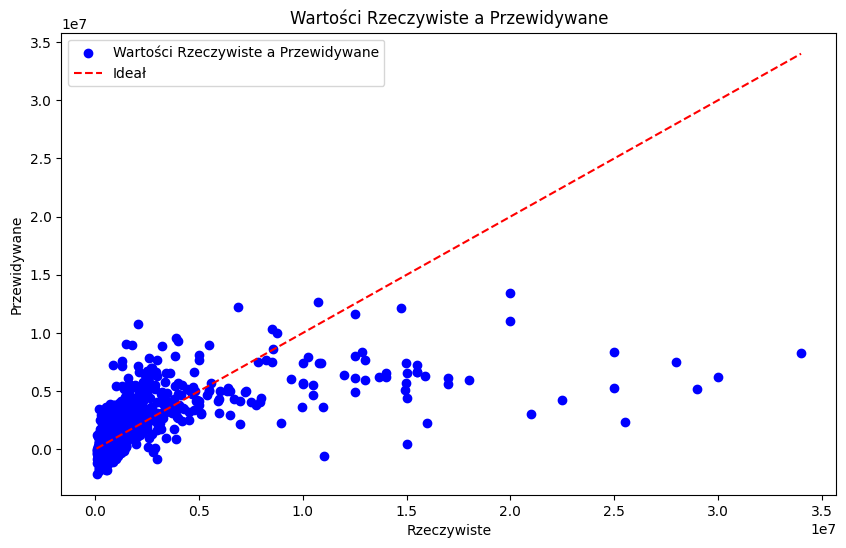

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Wartości Rzeczywiste a Przewidywane')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideał')
plt.title('Wartości Rzeczywiste a Przewidywane')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()

Z wykresu możemy wnioskować, że model średnio sobie radzi z przewidywaniem wyższych wartości. Może być to spowodowane niewystarczającą liczbą przypadków ogłoszeń z cenami >1.5 miliona lub wybraniem złego modelu.

Cross Validation Score:  [0.3048472  0.42354097 0.34307738 0.32622976 0.40298448 0.33415731
 0.35389578 0.43982456 0.34043789 0.23120915 0.48988149 0.24331674
 0.49782386 0.28851387 0.38692206 0.31823726 0.5076094  0.24137524
 0.20087974 0.3717199  0.30186297 0.36090288 0.36091703 0.47216805
 0.32848872 0.40213783 0.28580038 0.3227488  0.31614519 0.31932509
 0.27444135 0.34849079 0.42773341 0.55234023 0.23181206 0.34301315
 0.18369045 0.37432225 0.30588735 0.45629086 0.32173945 0.35631834
 0.33146502 0.30836542 0.48871109 0.33438085 0.32668307 0.21656633
 0.40950851 0.46846566 0.24628029 0.35716169 0.38562963 0.36004001
 0.31114419 0.44091716 0.52581639 0.24018291 0.21947161 0.36402104
 0.33655075 0.28235667 0.48104963 0.38214224 0.44749608 0.2721098
 0.3114152  0.38592847 0.32025077 0.27704416 0.29393787 0.37346854
 0.37172132 0.40549431 0.41534919 0.32788038 0.44813303 0.26441936
 0.20789418 0.31583986 0.18180707 0.37524692 0.28147825 0.4478128
 0.37382166 0.35915256 0.42621198 0.288

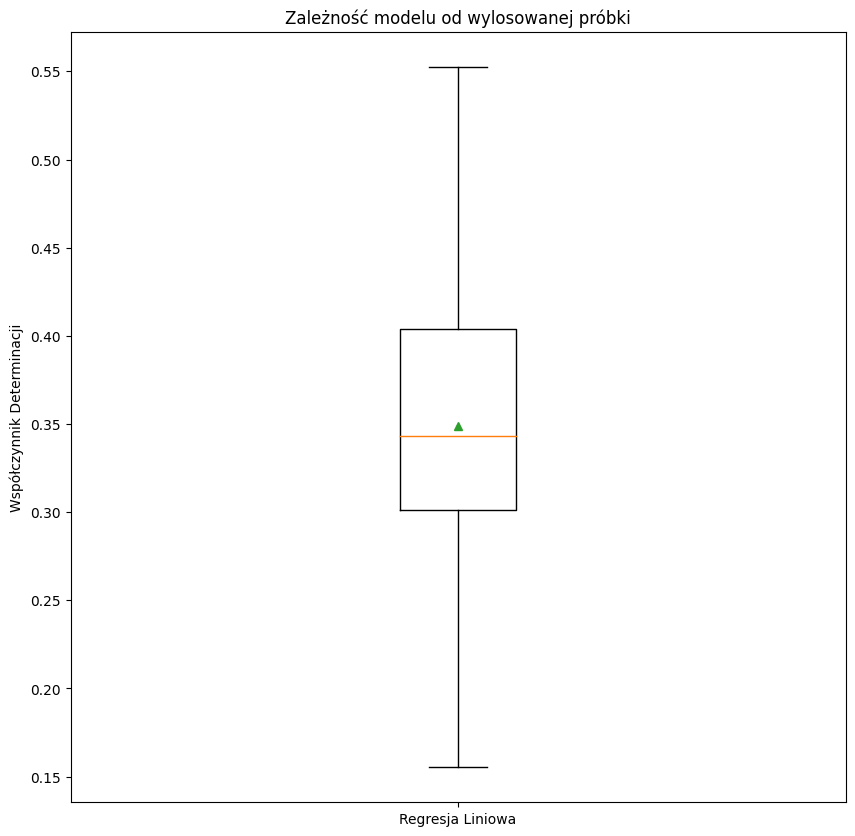

In [7]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
cv = RepeatedKFold(n_splits=10, n_repeats=10,random_state=1)
pipe_linear = Pipeline([
    ('linear', LinearRegression(fit_intercept=True))
])

model_linear_scores = cross_val_score(pipe_linear, X, y, scoring='r2', cv = cv)
print("Cross Validation Score: ", model_linear_scores)
plt.figure(figsize=(10, 10))
plt.boxplot([model_linear_scores], labels=['Regresja Liniowa'], showmeans=True)
plt.title('Zależność modelu od wylosowanej próbki')
plt.ylabel('Współczynnik Determinacji')
plt.show()

Na podstawie wyników walidacji krzyżowej możemy powiedzieć, że model nie jest  stabilny, ponieważ wyniki walidacji krzyżowej różnią się dosyć znacząco dla różnych podziałów danych. Przykładowo najwyższy wynik R^2 to 0.55 a najniższy około 0.15.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

pipe_linear = Pipeline([
    ('linear', LinearRegression(fit_intercept=True))
])

param_grid = {
    'linear__fit_intercept': [True, False],
    'linear__n_jobs': [None, 1, 2, 4, 8],
    'linear__positive': [False, True]

}

cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

# Perform grid search
grid_search = GridSearchCV(pipe_linear, param_grid, cv=cv, scoring='r2')
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'linear__fit_intercept': True, 'linear__n_jobs': None, 'linear__positive': False}
Best Score: 0.3488448065360991


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_x=X.copy()
vif_data = pd.DataFrame()
vif_data["feature"] = vif_x.columns

vif_data["VIF"] = [variance_inflation_factor(vif_x.values, i)
                          for i in range(len(vif_x.columns))]

print(vif_data)

         feature        VIF
0         BROKER   3.424444
1       LATITUDE  24.088323
2      LONGITUDE  46.314859
3           TYPE   3.725739
4        BOROUGH   3.215143
5  NEIGHBOURHOOD   4.328808
6           BEDS   9.242304
7       POSTCODE  13.026365
8           BATH   8.219750
9   PROPERTYSQFT   5.652389


Wysokie wartości VIF dla zmiennych BEDS, POSTCODE, BATH, PROPERTYSQFT, LATITUDE oraz LONGITUDE wskazują na ich silną korelację z innymi zmiennymi w zbiorze danych. Z uwagi na to, że wysokie wartości VIF są zazwyczaj niepożądane i mogą świadczyć o możliwej wieloliniowości modelu, rozważenie działań mających na celu zmniejszenie korelacji, np. przez zastosowanie analizy głównych składowych (PCA), może być wskazane.

In [10]:
from sklearn.decomposition import PCA

n_comp = 6
col_names = ['feature_'+str(i) for i in range(0,n_comp)]
pca = PCA(n_components=n_comp)
data_relevant_pca = pd.DataFrame(pca.fit_transform(X), columns = col_names)

data_relevant_pca

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5
0,-161.996266,-115.604465,26.933015,-1.502278,-0.524361,-0.060368
1,405.600518,-113.137165,1.529599,1.664794,1.029621,0.612129
2,-221.973645,-114.140947,26.179353,-1.457868,-0.480821,-0.040537
3,408.315389,-26.271092,-46.062553,0.790193,-1.800866,-0.051927
4,-161.897677,-113.999705,22.199013,-1.565854,-0.508710,-0.188432
...,...,...,...,...,...,...
4501,-221.522691,-106.138266,5.696170,-3.734768,-0.407511,-0.058016
4502,155.724427,-17.484736,-69.383974,-5.250187,0.523221,0.006469
4503,-162.175676,-118.498272,35.479340,-3.388526,-0.508557,0.015195
4504,-145.177221,89.001470,-38.528559,-2.844816,0.720788,0.006368


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_relevant_pca, y, test_size=0.3, random_state=42)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_x=data_relevant_pca.copy()

vif_data = pd.DataFrame()
vif_data["feature"] = vif_x.columns

vif_data["VIF"] = [variance_inflation_factor(vif_x.values, i)
                          for i in range(len(vif_x.columns))]

print(vif_data)

     feature  VIF
0  feature_0  1.0
1  feature_1  1.0
2  feature_2  1.0
3  feature_3  1.0
4  feature_4  1.0
5  feature_5  1.0


Wartości VIF wynoszące 1.0 dla wszystkich zmiennych wskazują na brak korelacji między nimi.
Taka sytuacja jest korzystne dla stabilności wybranego modelu.

In [13]:
reg_pca = LinearRegression().fit(X_train, y_train)

print('Współczynniki modelu: ',reg_pca.coef_)
print('Wyraz wolny: ', reg_pca.intercept_)

y_pred = reg_pca.predict(X_test)

print("\nR-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Współczynniki modelu:  [-8.00408231e+02 -8.48885438e+03  1.45686807e+04  1.32674542e+05
 -4.64438459e+05 -2.75789608e+06]
Wyraz wolny:  1710548.1834018864

R-squared: 0.1867849813104121
Mean Absolute Error: 1472007.5710042594
Median Absolute Error: 833256.5642988225
Mean Squared Error: 8518045377776.891
Root Mean Squared Error: 2918569.06338995


Model wytrenowany na danych po transformacji PCA wydaje się mieć ograniczoną zdolność do wyjaśniania zmienności cechy PRICE na podstawie dostarczonego zbioru - wynik współczynika determinacji wynosi około 0.15. Ponadto, wysokie wartości błędów wskazują na znaczną rozbieżność między przewidywanymi a rzeczywistymi wartościami zmiennej PRICE.

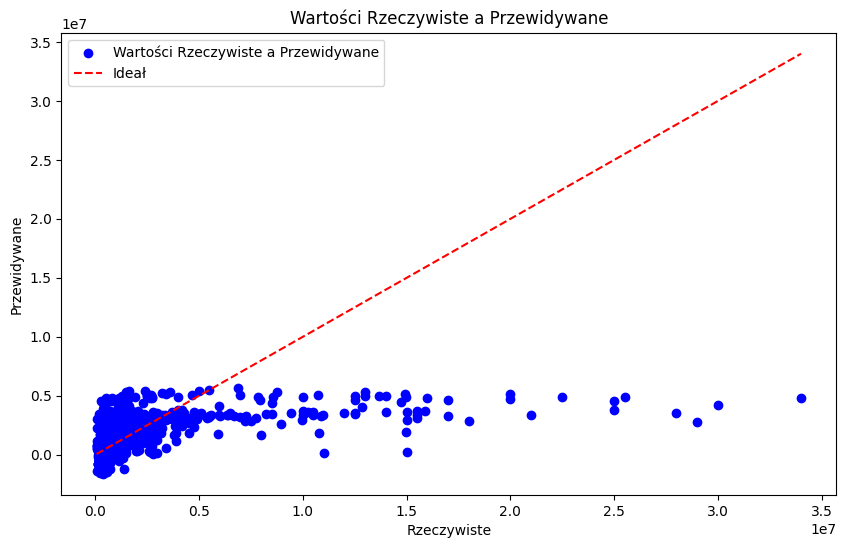

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Wartości Rzeczywiste a Przewidywane')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideał')
plt.title('Wartości Rzeczywiste a Przewidywane')
plt.xlabel('Rzeczywiste')
plt.ylabel('Przewidywane')
plt.legend()
plt.show()

Cross Validation Score:  [0.22456969 0.12135091 0.16043687 0.2207802  0.1433581  0.17514762
 0.19745571 0.16164154 0.15713593 0.13710569 0.16294432 0.19592756
 0.21469362 0.13717919 0.12834579 0.14219564 0.20406104 0.14507362
 0.13142583 0.17862491 0.18951502 0.14731603 0.15102189 0.13690514
 0.21530505]


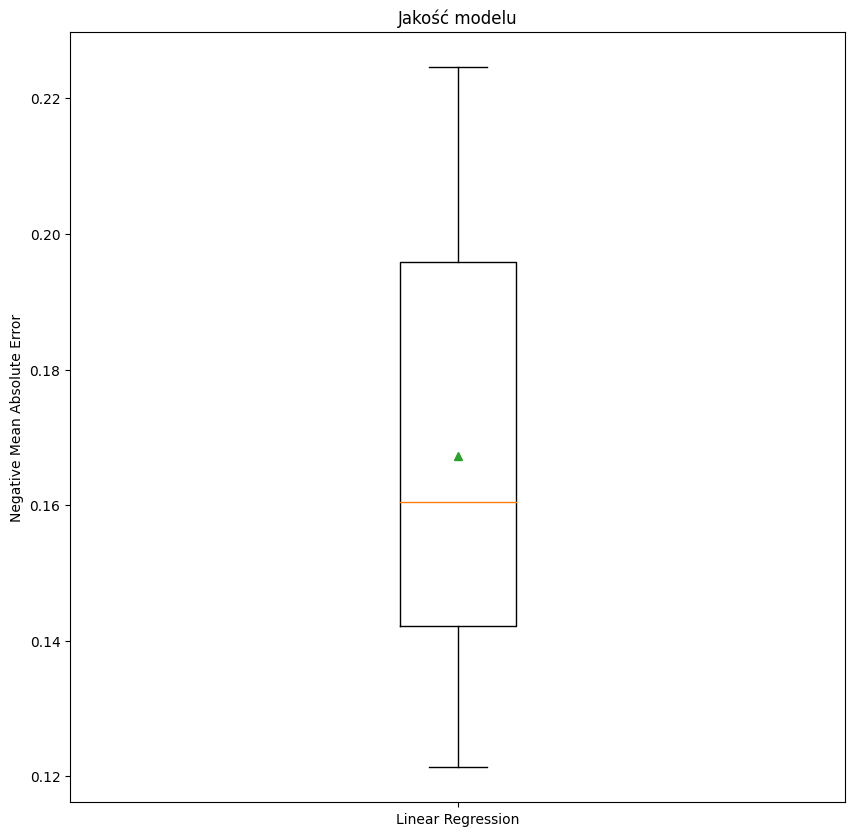

In [15]:
cv = RepeatedKFold(n_splits=5, n_repeats=5,random_state=1)
pipe_linear = Pipeline([
    ('linear', LinearRegression(fit_intercept=True))
])

model_linear_scores = cross_val_score(pipe_linear, data_relevant_pca, y, scoring='r2', cv = cv)
print("Cross Validation Score: ", model_linear_scores)
plt.figure(figsize=(10, 10))
plt.boxplot([model_linear_scores], labels=['Linear Regression'], showmeans=True)
plt.title('Jakość modelu')
plt.ylabel('Negative Mean Absolute Error')
plt.show()